# Final project

### Part one: Zhimin Li - zhl157

### First: how to figure out what is the best neighbothood in Pittsburgh?
After we discuss with our teammates. We think that we need to analysis in thre metrics.
My metric is about air quality about pittsburgh.So I upload the dataset about air quality in Pitts.

### Second: how to handle with all the data.

In [28]:
# import this csv file

import pandas as pd
import numpy as np

import ssl

ssl._create_default_https_context = ssl._create_unverified_context
pgh_AirQuality_data = pd.read_csv("https://data.wprdc.org/datastore/dump/967f1285-f8fb-4785-9673-64a8ae47588d",
                           index_col="site", 
                           parse_dates=True)
pgh_AirQuality_data.head()

,datetime,stat,bcstat,bcstat_txt,bp,bp_txt,co,co_txt,h2s,h2s_txt,...,sonicws,sonicws_txt,uvpm,uvpm_txt,rainfall,rainfall_txt,solarrad,solarrad_txt,uv_rad,uv_rad_txt
site,,,,,,,,,,,,,,,,,,,,,
Avalon,2016-01-15T00:00:00,Count,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,2016-01-15T00:00:00,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,2016-01-30T00:00:00,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,2016-01-15T00:00:00,Min,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,2016-01-15T00:00:00,Max,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### After I see so many data, I am comfused for a second= =. But if I need to find the best air quality in Pitts, I must know the basic algorithm of the air quality index.

##### Therefore, I search the air quality index in Google,and I got this: According to the graded concentration limits of various pollutants, fine particulate matter (PM2.5), inhalable particulate matter (PM10), sulfur dioxide (SO2), nitrogen dioxide (NO2), ozone (O3), carbon monoxide (CO), etc. The actual measured concentration values ​​of the pollutants (PM2.5 and PM10 are the 24-hour average concentrations) were calculated to obtain the Individual Air Quality Index, IAQI.

##### So I will handle with pm2.5, pm10, SO2, NO2, ozone and CO to complete this group project.
##### The lower of the index, the better of the neighborhood.

In [29]:
# let cancel some columns

pgh_AirQuality_data_new=pd.DataFrame(pgh_AirQuality_data, columns=['pm25','pm10','so2','no2','ozone','co'])
pgh_AirQuality_data_new

,pm25,pm10,so2,no2,ozone,co
site,,,,,,
Avalon,NaN,NaN,24.000,NaN,NaN,NaN
Avalon,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,NaN,NaN,0.000,NaN,NaN,NaN
Avalon,NaN,NaN,0.003,NaN,NaN,NaN
...,...,...,...,...,...,...
South Fayette,NaN,NaN,0.001,NaN,0.049,NaN
South Fayette,NaN,NaN,4.000,NaN,13.000,NaN
South Fayette,NaN,NaN,0.000,NaN,0.040,NaN


#### After this, I will arrange the data in ascending order one by one in columns.
#### methods: because there are some none data in the dataset, we dirctely use .mean to calculate the  result (.mean will skip the 'none')

In [30]:
# calculate the average of every row

ave=pgh_AirQuality_data_new.mean(1)
ave

site
Avalon           24.000
Avalon              NaN
Avalon              NaN
Avalon            0.000
Avalon            0.003
                  ...  
South Fayette     0.025
South Fayette     8.500
South Fayette     0.020
South Fayette    16.000
South Fayette       NaN
Length: 133122, dtype: float64

#### And then we sort this data (we don't need to care about the none data).

In [31]:
# add the 'ave' row in dataset

pgh_AirQuality_data_new['ave']=ave
pgh_AirQuality_data_new

,pm25,pm10,so2,no2,ozone,co,ave
site,,,,,,,
Avalon,NaN,NaN,24.000,NaN,NaN,NaN,24.000
Avalon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalon,NaN,NaN,0.000,NaN,NaN,NaN,0.000
Avalon,NaN,NaN,0.003,NaN,NaN,NaN,0.003
...,...,...,...,...,...,...,...
South Fayette,NaN,NaN,0.001,NaN,0.049,NaN,0.025
South Fayette,NaN,NaN,4.000,NaN,13.000,NaN,8.500
South Fayette,NaN,NaN,0.000,NaN,0.040,NaN,0.020


In [33]:
# sort the dataset 

pgh_AirQuality_data_sort=pgh_AirQuality_data_new.sort_values(by="ave")
pgh_AirQuality_data_sort.head(100)

,pm25,pm10,so2,no2,ozone,co,ave
site,,,,,,,
Glassport High Street,NaN,-6.0,NaN,NaN,NaN,NaN,-6.0
Flag Plaza,NaN,-6.0,NaN,NaN,NaN,NaN,-6.0
Lincoln,0.0,-8.0,NaN,NaN,NaN,NaN,-4.0
Liberty 2,NaN,-4.0,NaN,NaN,NaN,NaN,-4.0
Liberty 2,NaN,-4.0,NaN,NaN,NaN,NaN,-4.0
...,...,...,...,...,...,...,...
Liberty 2,0.0,-3.0,NaN,NaN,NaN,NaN,-1.5
Liberty 2,1.0,-4.0,NaN,NaN,NaN,NaN,-1.5
Lincoln,-1.0,-2.0,NaN,NaN,NaN,NaN,-1.5


#### And then we cancel all the columns but 'ave'.

In [35]:
# delete extra columns

pgh_AirQuality_data_del=pgh_AirQuality_data_sort.drop(columns=['pm25','pm10','so2','no2','ozone','co'])
pgh_AirQuality_data_del

,ave
site,
Glassport High Street,-6.0
Flag Plaza,-6.0
Lincoln,-4.0
Liberty 2,-4.0
Liberty 2,-4.0
...,...
Liberty 2,NaN
Lincoln,NaN
North Braddock,NaN


#### We have learned .groupby, so we use it to merge functions with the same site name.

In [36]:
pgh_AirQuality_data_sum=pgh_AirQuality_data_del.groupby('site').sum()
pgh_AirQuality_data_sum

,ave
site,
Avalon,66986.45000
Clairton,12358.07200
Flag Plaza,174595.19705
Glassport High Street,147738.00000
Harrison Township,75109.32400
Lawrenceville,58321.35600
Lawrenceville 2,54819.12410
Liberty,57039.70300
Liberty 2,140450.50000


#### It is like the sum of pollution of every neighborhood in Pittsburgh (we generally solve the time problem! Because it is the sum).
#### Therefore, we just need to plot it, and we will get the lowest elements (the clean neighborhood).

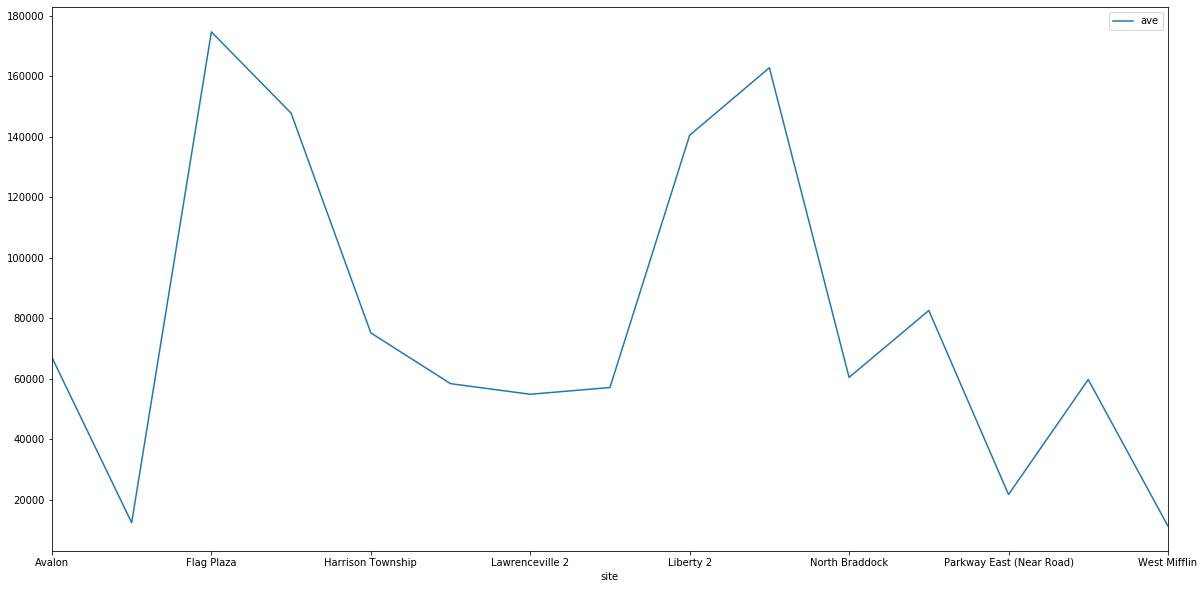

In [37]:
# plot it!

pgh_AirQuality_data_sum.plot(figsize=(20,10))

##### I get three target neighborhoods in Pittsburgh: Clairton, West Mifflin and Parkway East (Near Road)

### Part two: Harrison Yen - HAY58

#### Introduction

Using the Western PA Regional Data Center, we used 3 different data sets to ultimately determine the best neighborhood in the Pittsburgh area. 

Our metrics are:
- Median age at Death
- Air Quality
- ???

I decided to include the median age of death as one of our metrics because how long you live is a good indicator of how healthy you are. Better neighborhoods should have a higher median age of death since they are better educated and can focus more on fitness and nutrition.

#### The Metric

The median age at death is calculated for each municipality in Allegheny County. Data is based on the decedent's residence at the time of death, not the location where the death occurred. Median age by municipality is based on “official” death records that have been released by the Pennsylvania Department of Health. Data is broken out by race (white/black), and also includes a count of deaths for City of Pittsburgh neighborhoods and Allegheny County Municipalities.

In [38]:
import pandas as pd
import numpy as np

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

median_age_data = pd.read_csv("https://data.wprdc.org/dataset/ee735209-4de7-4ea4-b446-bf0f0f6d9cb3/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2/download/nhoodmedianage20112015.csv")
                     
                           
median_age_data.head(20)

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0,0.0,0.0,0.0,0.0,0.0
1,CHATEAU,0.0,0.0,2.0,NaN,2.0,NaN
2,NORTH SHORE,0.0,0.0,4.0,NaN,5.0,80.0
3,ALLEGHENY WEST,3.0,NaN,4.0,NaN,8.0,65.0
4,SAINT CLAIR,5.0,67.5,5.0,67.5,10.0,67.5
5,WEST END,5.0,76.7,9.0,78.0,14.0,77.5
6,ESPLEN,3.0,NaN,13.0,72.5,16.0,71.7
7,ARLINGTON HEIGHTS,10.0,55.0,7.0,72.5,17.0,63.7
8,STRIP DISTRICT,7.0,76.7,12.0,70.0,19.0,72.5
9,FAIRYWOOD,11.0,62.5,9.0,42.5,21.0,53.3


In [39]:
median_age_data['TOTAL MD AGE AT DEATH'].max()

85.9

Winner: Squirrel Hill South


#### The Best Neighborhood

The best neighborhood is Squrrel Hill South 

In [40]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

median_age_data.describe()

,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
count,90.000000,77.000000,90.000000,81.000000,90.000000,89.000000
mean,47.022222,64.014286,121.055556,76.239506,171.211111,74.848315
std,59.622403,18.668843,150.501436,10.798202,158.504988,9.736227
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,62.200000,15.500000,73.300000,55.000000,72.000000
50%,20.500000,69.300000,72.500000,78.100000,133.500000,76.500000
75%,60.750000,74.000000,159.000000,80.400000,219.250000,79.200000
max,287.000000,83.200000,723.000000,88.400000,802.000000,85.900000


This chart shows the total count, mean, standard deviation, min, max etc. for Black and white deaths, median age of black and white deaths, and the total median age at death which is what we are focusing on.

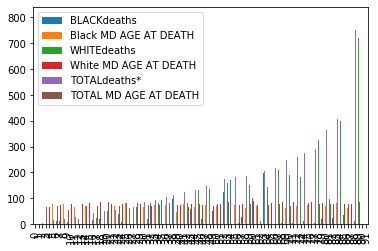

In [41]:
median_age_data.plot.bar()

This vertical bar graph shows us a side by side comparison of each neighborhood comparing their median age at death for black, white, and all races.

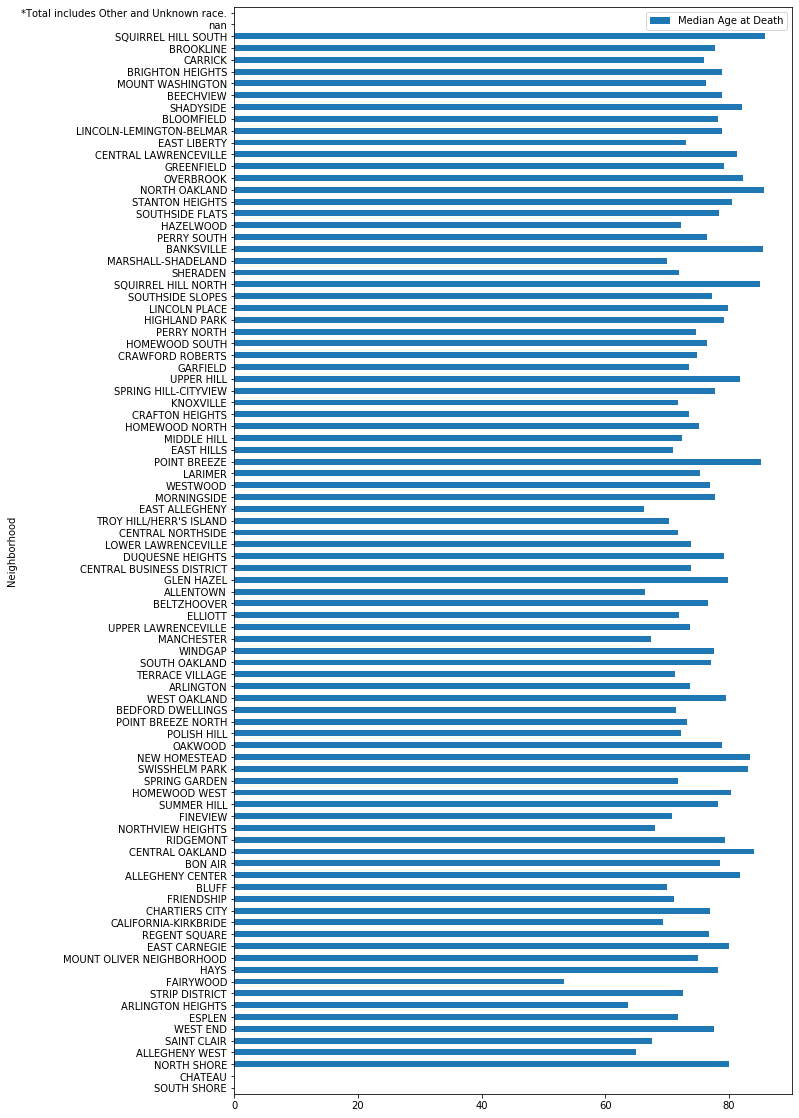

In [42]:
df = pd.DataFrame({'Neighborhood': median_age_data['NEIGHBORHOOD'], 'Median Age at Death': median_age_data['TOTAL MD AGE AT DEATH']})
df.plot.barh(figsize = (10, 20), x='Neighborhood', y='Median Age at Death')

This horizontal bar graph is probably the most meaningful because it shows specifically the median age of death for all ages in a clear format. From the graph, you can see that it is a close race between the neighborhoods Squirrel Hill South, North Oakland, Banksville, Squirrel Hill North, Point Breeze, and Central Oakland, with Squirrel Hill South ultimately coming out on top with a median death age of 85.9.

In [43]:
# import dataset
steps = pd.read_csv("https://data.wprdc.org/dataset/ee735209-4de7-4ea4-b446-bf0f0f6d9cb3/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2/download/nhoodmedianage20112015.csv")
# filter to important info
num_steps = steps.groupby("NEIGHBORHOOD").sum()['TOTAL MD AGE AT DEATH']
num_steps.sort_values(ascending=False)

median_age_data.nlargest(10, ['TOTAL MD AGE AT DEATH'])


,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
89,SQUIRREL HILL SOUTH,58.0,83.2,721.0,86.2,802.0,85.9
76,NORTH OAKLAND,45.0,70.9,227.0,86.8,279.0,85.6
71,BANKSVILLE,4.0,NaN,247.0,85.5,253.0,85.5
53,POINT BREEZE,13.0,66.7,158.0,85.7,175.0,85.1
68,SQUIRREL HILL NORTH,6.0,75.0,231.0,85.3,242.0,85.0
20,CENTRAL OAKLAND,2.0,NaN,50.0,84.0,52.0,84.0
28,NEW HOMESTEAD,4.0,NaN,67.0,83.8,71.0,83.4
27,SWISSHELM PARK,0.0,0.0,67.0,83.1,67.0,83.1
77,OVERBROOK,4.0,NaN,284.0,82.5,289.0,82.2
83,SHADYSIDE,72.0,81.2,320.0,82.4,406.0,82.1


#### Final

My personal favorite neighborhood is Center Allegheny because it is where I was raised and it is different than the data driven determination of the "best neighborhood" Squirrel Hill South. Squirrel Hill North also came just short of the top spot with a median death age of 85.0. I am actually not surprised that the winner was Squirrel Hill South. Both Squirrel Hill South and Squirrel Hill North are amazing places to live in the city of Pittsburgh. Both neighborhoods are wealthier than most neighborhoods in Pittsburgh meaning that the residents are able to focus on health and fitness more leading to a later median death age. From personal experience, I know that Squirrel Hill South has some amazing quality restaurants so that is also another metric I would have used to compare neighborhoods if I had more time. Overall, I really enjoyed this project as it allowed me to get more familiar with Pandas especially by creating the different graphs. I also thought it was really cool to be able to research and compare neighborhoods as it has never been something that I thought I would be interested in.

### Final Result
Li got three target neighborhoods in Pittsburgh: Clairton, West Mifflin and Parkway East (Near Road). However, Yen got the result that Squirrel Hill is the best. After we tried to find the coincident area, we finally got the result Squirrel Hill, because Parkway East (Near Road) has a large part of the area is coincident with Squirrel Hill.

### Best Neighborhood: Squirrel Hill!!!

# Thank all! Team 2.

![alt_text](https://media.giphy.com/media/JoV6WP96snO0DOnqEz/giphy.gif)

## Because one of our teammates can not join our teamwork because of personal problem, we decided to write more explaination and write a brife conclusion to make up our absence of presentation. It will contain this project explaination, and our gains in this team project. Thanks for your help!